In [6]:
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling  import SMOTE
from tensorflow.keras import layers
data = pd.read_csv('Raw_Data.csv')
pd.set_option('display.max_columns', None)
data.head()
# Original Code Author: Suraj Sanganbhatla

,RowId,Gender,Age_Gap,Graduation_Status,Current_occupation,Spouse_Occupation_Field,Spouse_Graduation_Status,Occupation_Status,Spouse_Occupation_Status,Social_Status_preference,Marriage_Preference,Financial_Independence,Spouse_Financial_Independence,Mental_Health_Status,Spouse_Mental_Health_Preference,Consent_for_Children,Height_Difference( In Inches),Approx_Income (In Lakhs),Spouse_Income_Preference( In Lakhs),Relation_with_InLaws,Pre_Marital_Relation_Status,Spouse_Pre_Marital_Relation_Status,Time_Together_Before_Marriage,Output
0,1,Female,5,Yes,Engineer,Engineer,Yes,No,Yes,1,1,Yes,Yes,6,6,Yes,6.0,1.0,2.0,6,Yes,Yes,0 - 1,Success
1,2,Female,-1,Yes,Engineer,Engineer,Yes,Yes,Yes,3,6,Yes,Yes,5,5,Yes,5.0,8.0,8.0,4,Yes,Yes,6 - 10,Success
2,3,Female,-2,Yes,Engineer,Business Owner,Yes,Yes,Yes,6,4,Yes,Yes,5,4,Yes,3.0,12.0,9.0,3,No,Yes,2 - 4,Success
3,4,Male,2,Yes,Engineer,Engineer,Yes,No,Yes,6,3,No,Yes,5,4,Yes,3.0,0.0,99.0,5,No,No,0 - 1,Success
4,5,Male,0,Yes,Engineer,Teacher/Professor/Lecturer,Yes,No,Yes,6,4,No,Yes,2,5,Yes,5.0,5.0,5.0,5,No,No,2 - 4,Success


In [7]:
binary_columns = [
      'Gender', 'Graduation_Status', 'Current_occupation', 'Spouse_Occupation_Field', 'Spouse_Graduation_Status',
     'Occupation_Status', 'Spouse_Occupation_Status', 'Financial_Independence',
     'Spouse_Financial_Independence', 'Consent_for_Children', 'Pre_Marital_Relation_Status', 'Spouse_Pre_Marital_Relation_Status', 'Time_Together_Before_Marriage', 'Output'
]
label_encoder = LabelEncoder()
mappings = {}
for col in binary_columns:
    data[col] = label_encoder.fit_transform(data[col].astype(str))
    mappings[col] = {label: index for index, label in enumerate(label_encoder.classes_)}

# data = data.drop(['RowId'], axis = 1)

In [8]:
for col, mapping in mappings.items():
    print(f"Mapping for {col}: {mapping}")

Mapping for Gender: {'Female': 0, 'Male': 1}
Mapping for Graduation_Status: {'No': 0, 'Yes': 1}
Mapping for Current_occupation: {'Actor': 0, 'Advocate/Lawyer': 1, 'Business Owner': 2, 'Doctor': 3, 'Engineer': 4, 'Other': 5, 'Police': 6, 'Teacher/Professor/Lecturer': 7}
Mapping for Spouse_Occupation_Field: {'Actor': 0, 'Advocate/Lawyer': 1, 'Business Owner': 2, 'Doctor': 3, 'Engineer': 4, "I don't want my spouse to work": 5, 'Lawyer': 6, 'Other': 7, 'Police': 8, 'Teacher/Professor/Lecturer': 9}
Mapping for Spouse_Graduation_Status: {'No': 0, 'Yes': 1}
Mapping for Occupation_Status: {'No': 0, 'Yes': 1}
Mapping for Spouse_Occupation_Status: {'No': 0, 'Yes': 1}
Mapping for Financial_Independence: {'No': 0, 'Yes': 1}
Mapping for Spouse_Financial_Independence: {'No': 0, 'Yes': 1}
Mapping for Consent_for_Children: {'No': 0, 'Yes': 1}
Mapping for Pre_Marital_Relation_Status: {'No': 0, 'Yes': 1}
Mapping for Spouse_Pre_Marital_Relation_Status: {'No': 0, 'Yes': 1}
Mapping for Time_Together_Before

In [9]:
X = data.drop(['Output'], axis = 1)
Y = data['Output']
smote = SMOTE(random_state=42)
X, Y = smote.fit_resample(X, Y)
data = X
data['Output'] = Y
X = data.drop(['Output'], axis = 1).astype(int)
Y = data['Output'].astype(int)

/Users/surajs/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [11]:
import numpy as np
import pandas as pd

# Assuming 'data' is a pandas DataFrame with 163 rows and 22 columns
data_shape = data.shape
num_augmented_records = 9842
noise_variance = 0.005

# Initialize augmented data DataFrame
augmented_data = pd.DataFrame(columns=data.columns)

# Generate augmented records
for i in range(num_augmented_records):
    # Add random noise to each feature/column
    noise = np.random.normal(loc=0, scale=noise_variance, size=data_shape[1])
    # Select a random row from the original data
    random_row = data.iloc[np.random.randint(data_shape[0])]
    # Add noise to the selected row
    augmented_row = random_row + noise
    # Apply thresholding to ensure binary values (1s and 0s)
    augmented_row = (augmented_row >= 0.5).astype(int)
    # Append the augmented row to the augmented data DataFrame
    augmented_data = pd.concat([augmented_data, augmented_row.to_frame().T], ignore_index=True)

# Concatenate original data and augmented data
augmented_data = pd.concat([data, augmented_data])

data = augmented_data

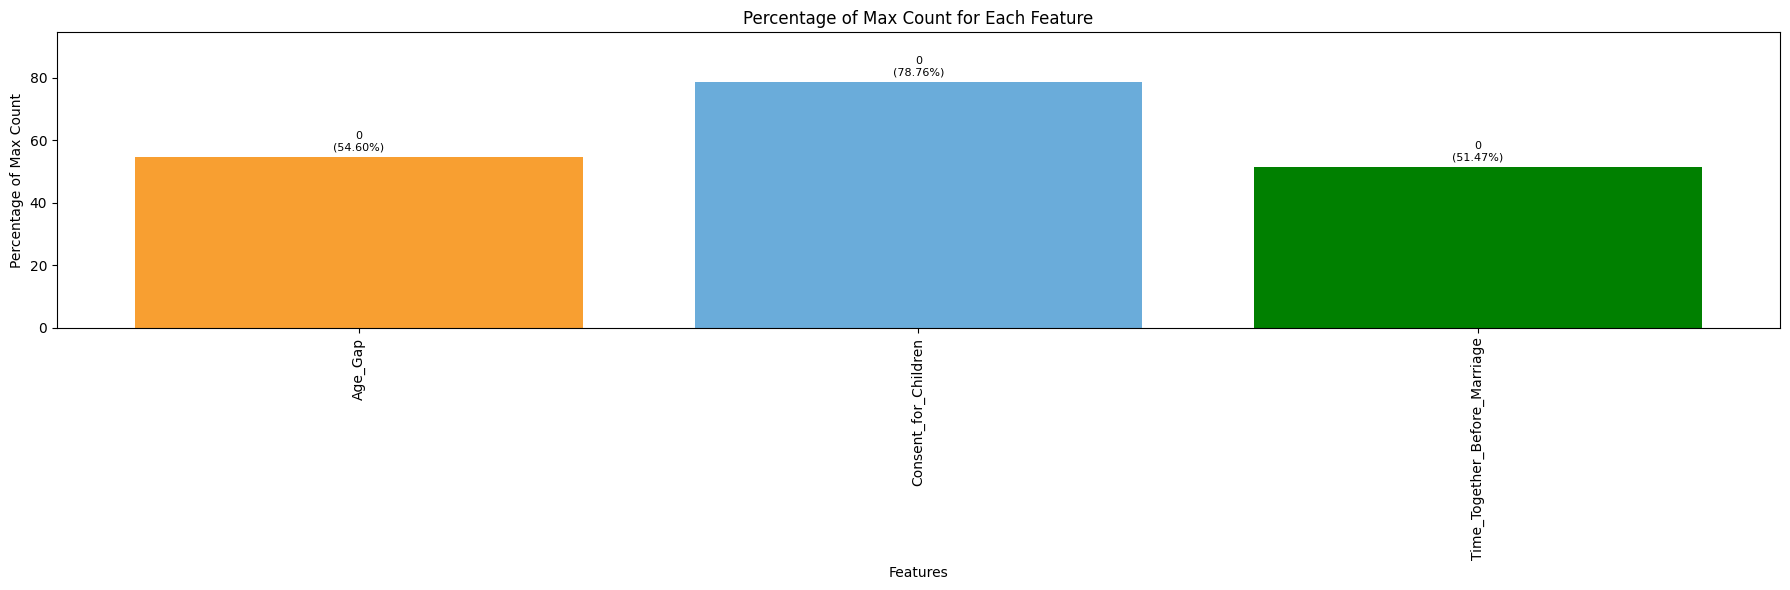

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('final_augumented_data.csv')

# Initialize lists to store data for plotting
features = []
max_values = []
max_percentages = []

# Loop through columns
columns = data.drop(['Output', 'Gender'], axis = 1)
success_records = data[data['Output'] == 1]
divorce_records = data[data['Output'] == 0]
for feature in columns:
      filtered_data1 = success_records[feature].value_counts()
      filtered_data2 = divorce_records[feature].value_counts()

      idx1 = filtered_data1.idxmax()
      idx2 = filtered_data2.idxmax()
      if idx1 != idx2:
        mx = filtered_data2.max()
        sm = filtered_data2.sum()
        percent = mx * 100 / sm

        # Append data to lists
        features.append(feature)
        max_values.append(idx2)
        max_percentages.append(percent)

# Plotting
colors = ['#F89F31', '#6AACDA', 'green']
plt.figure(figsize=(18, 6))
plt.bar(features, max_percentages, color=colors)
plt.xlabel('Features')
plt.ylabel('Percentage of Max Count')
plt.title('Percentage of Max Count for Each Feature')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.ylim(0, max(max_percentages) * 1.2)  # Set y-axis limit
for i, percent in enumerate(max_percentages):
    plt.text(i, percent + 2, f'{max_values[i]}\n({percent:.2f}%)', ha='center', fontsize=8)
plt.tight_layout()
plt.show()

In [13]:
data['Output'].value_counts()

Output
1    5009
0    4991
Name: count, dtype: int64

In [14]:
X = data.drop("Output", axis = 1)
Y = data["Output"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42, stratify = Y)
X_train = X_train.astype(np.float32)
Y_train = Y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
Y_test = Y_test.astype(np.float32)
np.save("X_train.npy", X_train)
np.save("Y_train.npy", Y_train)
np.save("X_test.npy", X_test)
np.save("Y_test.npy", Y_test)

In [15]:
data['Output'].value_counts()

Output
1    5009
0    4991
Name: count, dtype: int64

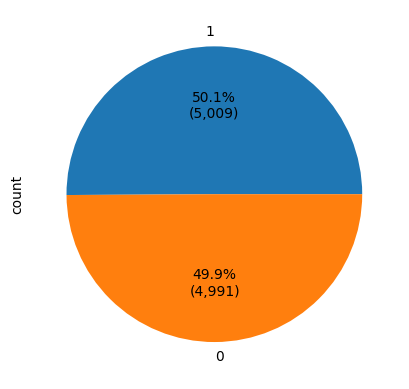

In [16]:
import matplotlib.pyplot as plt
data['Output'].value_counts().plot(kind='pie', autopct=lambda p: '{:.1f}%\n({:,.0f})'.format(p, (p/100)*data['Output'].value_counts().sum()))

plt.show()


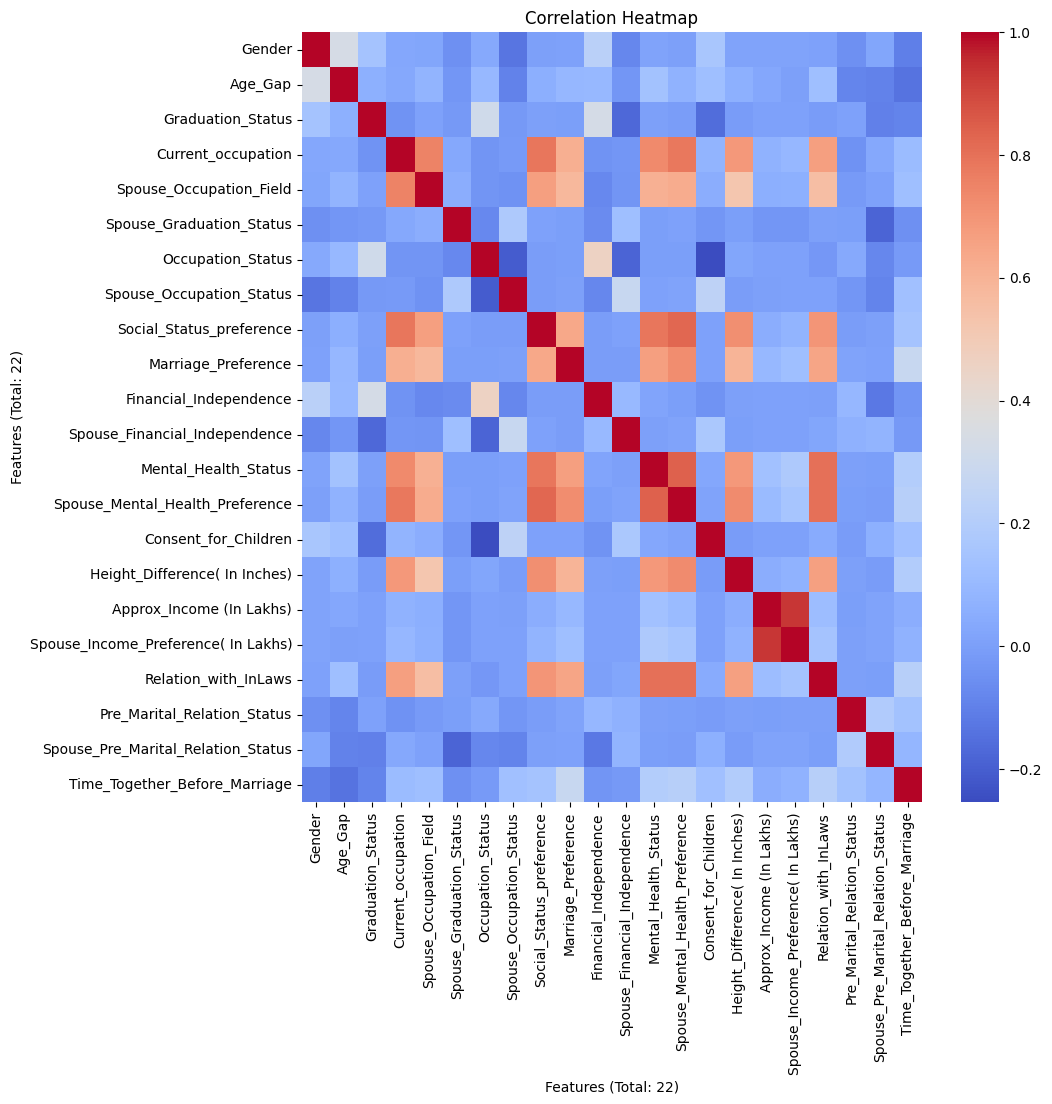

In [18]:
import seaborn as sns

mat = data.drop('Output', axis=1).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(mat, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.xlabel(f'Features (Total: {mat.shape[1]})')
plt.ylabel(f'Features (Total: {mat.shape[1]})')
plt.show()

In [21]:
from tensorflow.keras import layers, models, regularizers

# Define your capsule layer
class CapsuleLayer(layers.Layer):
    def __init__(self, num_capsules, capsule_dim, routings=3, kernel_initializer='glorot_uniform', **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsules = num_capsules
        self.capsule_dim = capsule_dim
        self.routings = routings
        self.kernel_initializer = keras.initializers.get(kernel_initializer)

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.kernel = self.add_weight(name='kernel', shape=(input_dim, self.num_capsules * self.capsule_dim),
                                      initializer=self.kernel_initializer, trainable=True)
        super(CapsuleLayer, self).build(input_shape)

    def call(self, u_vecs):
        u_hat_vecs = keras.backend.dot(u_vecs, self.kernel)
        u_hat_vecs = keras.backend.reshape(u_hat_vecs, (-1, self.num_capsules, self.capsule_dim))
        return self.squash(u_hat_vecs)

    def squash(self, vectors):
        epsilon = 1e-6
        squared_norm = keras.backend.sum(keras.backend.square(vectors), axis=-1, keepdims=True)
        scale = squared_norm / (1 + squared_norm) / keras.backend.sqrt(squared_norm + epsilon)
        return scale * vectors

    def compute_output_shape(self, input_shape):
        return tuple([None, self.num_capsules, self.capsule_dim])

# Build the Hypernetwork model
def build_hypernetwork(input_shape, num_classes):
    x = layers.Input(shape=input_shape)
    hyper_output = layers.Dense(22, activation='relu')(x)
    return models.Model(inputs=x, outputs=hyper_output)

# Build the Capsule Neural Network model
def build_capsule_model(input_shape, num_classes):
    x = layers.Input(shape=input_shape)
    capsule = CapsuleLayer(num_capsules=100, capsule_dim=100, routings=7)(x)
    output = layers.Flatten()(capsule)
    output = layers.Dropout(0.5)(output)  # Dropout layer added
    output = layers.Dense(num_classes, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))(output)
    return models.Model(inputs=x, outputs=output)


In [22]:
input_shape = (22,)
num_classes = 2

hypernetwork = build_hypernetwork(input_shape, num_classes)
capsule_model = build_capsule_model(input_shape, num_classes)

combined_model = keras.Sequential([hypernetwork, capsule_model])

In [23]:
# Compile the model
combined_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = combined_model.fit(X_train, Y_train, epochs=500, verbose = 1)

Epoch 1/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5672 - loss: 0.7216
Epoch 2/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7784 - loss: 0.6595
Epoch 3/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8386 - loss: 0.5606
Epoch 4/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8618 - loss: 0.4570
Epoch 5/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8874 - loss: 0.3808
Epoch 6/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8856 - loss: 0.3608
Epoch 7/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8973 - loss: 0.3334
Epoch 8/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8860 - loss: 0.3349
Epoch 9/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8873 - loss: 0.3281
Epoch 10/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8964 - loss: 0.3053
Epoch 11/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8916 - loss: 0.3131
Epoch 12/500
219/219 ━━━━━━━━━━━━━━━━━━━━

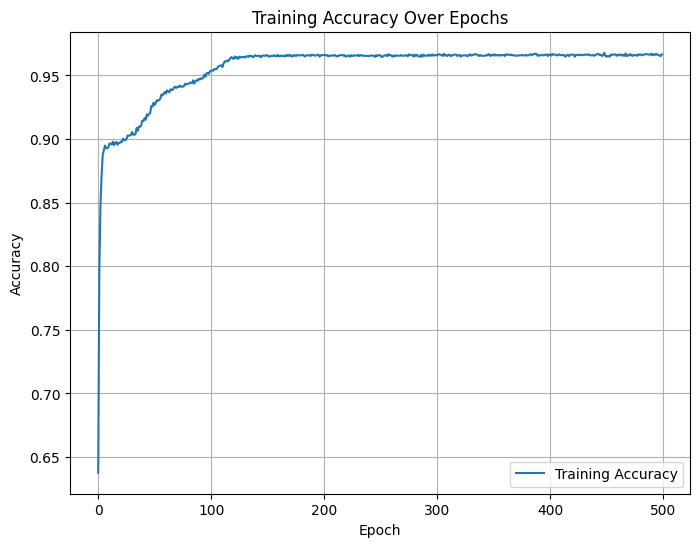

In [28]:
np.save("history.npy", history)
accuracy = history.history['accuracy']

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(accuracy, label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Evaluate on test data
test_loss, test_acc = combined_model.evaluate(X_test, Y_test)
print(f'Test Accuracy: {test_acc}')
combined_model.save("my_model.h5")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9608 - loss: 0.0958


Test Accuracy: 0.9673333168029785


In [32]:
from tensorflow.keras.models import load_model

# Assuming CapsuleLayer class is defined in the context as provided
custom_objects = {'CapsuleLayer': CapsuleLayer}

model = load_model('my_model.h5', custom_objects=custom_objects)
model.predict(np.array([[0, 2, 1, 5, 4, 1, 1, 1, 6, 3, 1, 1, 6, 6, 1, 7, 0, 10, 6, 1, 0, 3]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[0.00878537, 0.99121463]], dtype=float32)

In [33]:
model.predict(np.array([[1, -7, 1, 5, 8, 1, 1, 1, 6, 1, 1, 1, 1, 4, 0, 4, 4.8, 8, 1, 0, 1, 0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[0.7299717, 0.2700285]], dtype=float32)

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

In [35]:
model = combined_model
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

report = classification_report(Y_test, Y_pred_classes)
print(report)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      1497
         1.0       0.97      0.96      0.97      1503

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



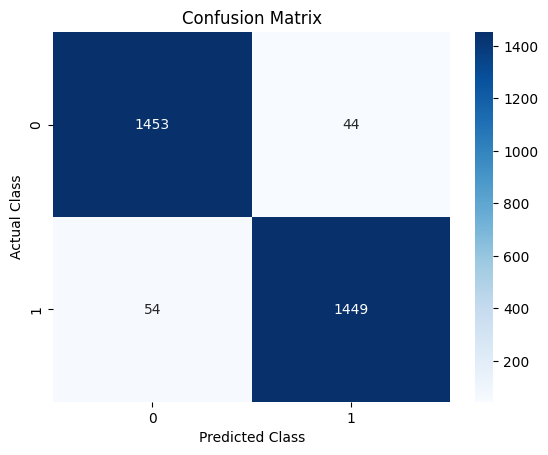

In [36]:
cm = confusion_matrix(Y_test, Y_pred_classes)
fig, ax = plt.subplots()

sns.heatmap(cm, fmt = 'd', annot=True, cmap='Blues', ax=ax)

ax.set_xlabel('Predicted Class')
ax.set_ylabel('Actual Class')
ax.set_title('Confusion Matrix')


plt.show()

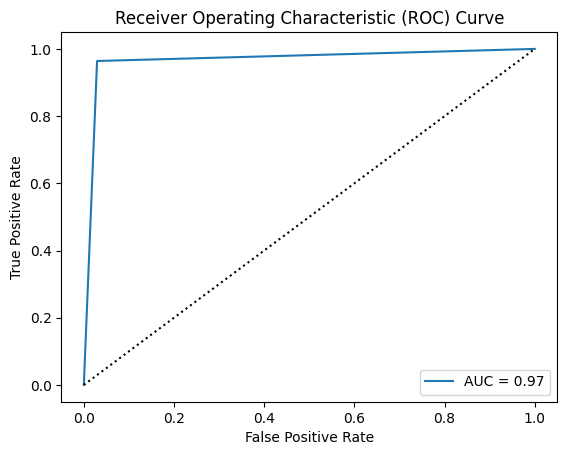

In [37]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_classes)
auc = roc_auc_score(Y_test, Y_pred_classes)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k:')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [38]:
# Original Code Author: Suraj Sanganbhatla (https://www.linkedin.com/in/iamssuraj/)